## 문제 0 
기본 세팅. tidyverse, data.table, VIM 패키지를 부른 후, setwd로 ‘data.csv’가 있는 폴더로 경로를 설정하고, 
fread로 ‘data.csv’를 불러오세요.



In [1]:
import pandas as pd
data = pd.read_csv('data.csv')

In [2]:
data.head()

,OC,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,...,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,surplus2,employee1,employee2,ownerChange
0,open,175.0,4.217530e+09,0.0,3.961135e+09,2.033835e+09,15652441.0,1.523624e+07,1.323624e+07,31641798.0,...,1.359897e+07,2.548115e+09,2.386263e+09,1.458986e+08,0.0,7.589937e+08,1.271224e+09,62.0,64.0,same
1,open,410.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,open,468.0,1.004522e+09,515483669.0,4.472197e+08,2.964023e+08,76156.0,3.000000e+04,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,234.0,1.0,same
3,open,353.0,7.250734e+10,0.0,7.067740e+10,3.178605e+10,506223059.0,1.259568e+09,1.196881e+09,173769780.0,...,1.235181e+09,3.958356e+10,3.485576e+10,3.915906e+09,0.0,3.775501e+10,7.740829e+09,663.0,663.0,same
4,open,196.0,4.904354e+10,0.0,4.765605e+10,2.446078e+10,112352259.0,1.419089e+09,1.307249e+09,0.0,...,4.427591e+08,4.653138e+10,4.562945e+10,7.893407e+08,0.0,5.143259e+10,9.025550e+09,206.0,197.0,same


## 문제 1. 
‘2’로 끝나는 변수를 모두 제거하세요. (단순히 변수의 이름 또는 인덱스 열거를 통한 제거가 아닌 적절한 함수
를 사용할 것) (‘2’로 끝나는 변수는 2016년 기준 값이고, ‘1’은 2017년 기준입니다. 정확한 모델링을 위해서는 이를 모두
고려해야 하지만, 전처리 방법 학습 및 간단한 모델링을 위해 2017년 기준 변수만 사용하도록 하겠습니다.) 

In [3]:
cols = [i for i in data.columns.tolist() if i[-1]!='2']
data = data[cols]

## 문제 2.
‘VIM’ 패키지를 이용하여 다음과 같이 시각화 한 후 간단히 해석해 보세요. (아래처럼 변수가 모두 출력이 안될
수 있습니다. 사용 색: pink, lightyellow)


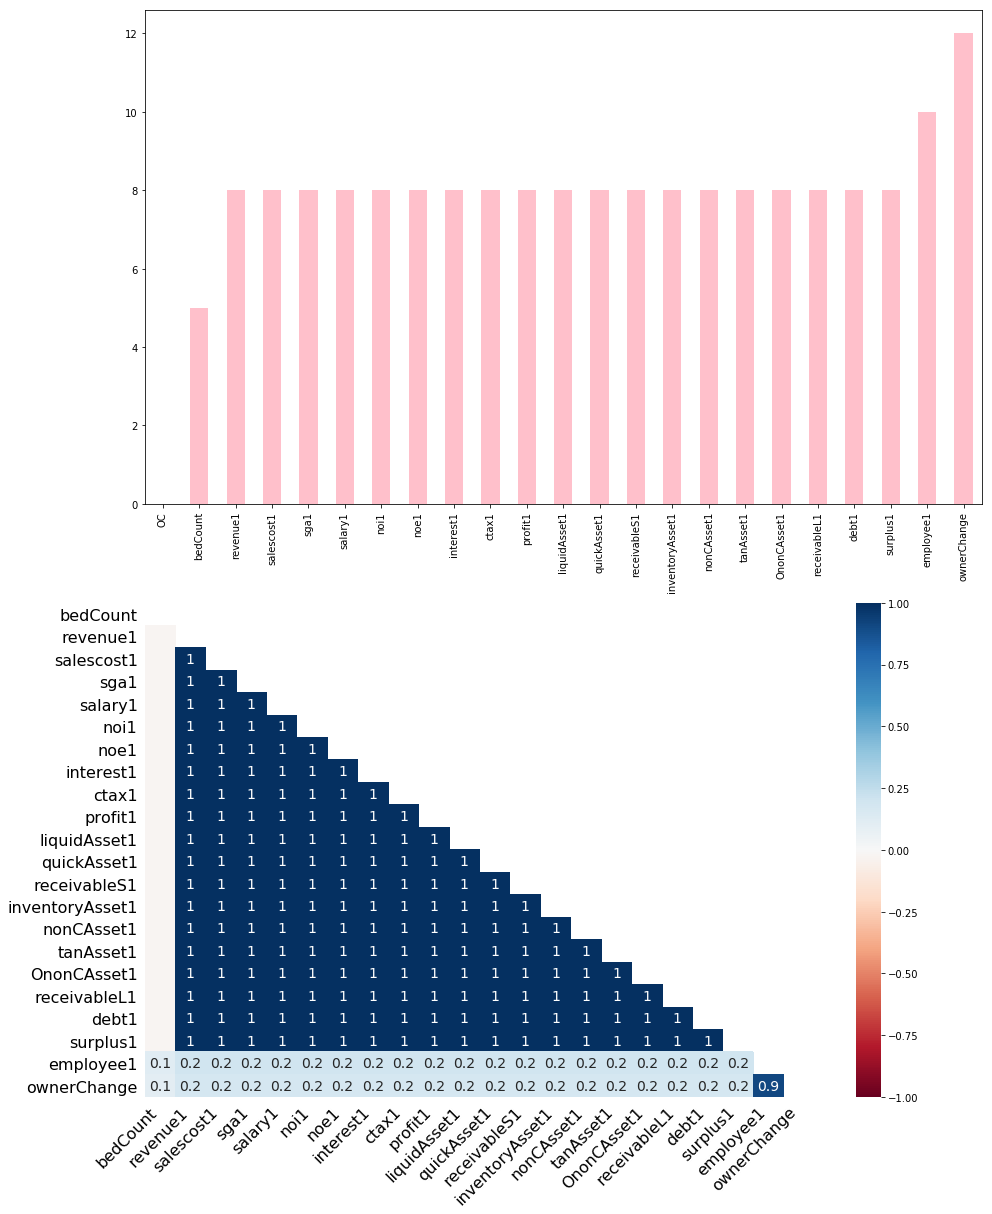

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
fig, ax = plt.subplots(2, figsize=(15,20))
data.isna().sum().plot.bar(color='pink', ax=ax[0])
msno.heatmap(data, ax=ax[1])


(파이썬에서 VIM 패키지처럼 할 방법을 모르겠어서.. 비슷한 의미라고 생각되는 그래프로 대체합니다 죄송합니다)
OwnerChange, employee1 변수에 값이 없다면 다른 변수에 값이 없을 수 있다.
employee1 변수 값이 있다면 ownerChange 변수에도 값이 있을 확률이 높다.

## 문제 3-1
NA imputation. 숫자 데이터의 NA값을 mean imputation을 통해 채우세요. (lapply 이용할 것)

In [5]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(data.iloc[:,1:-1])
data.iloc[:,1:-1] = imp_mean.transform(data.iloc[:,1:-1])

In [6]:
data.isna().sum()

OC                  0
bedCount            0
revenue1            0
salescost1          0
sga1                0
salary1             0
noi1                0
noe1                0
interest1           0
ctax1               0
profit1             0
liquidAsset1        0
quickAsset1         0
receivableS1        0
inventoryAsset1     0
nonCAsset1          0
tanAsset1           0
OnonCAsset1         0
receivableL1        0
debt1               0
surplus1            0
employee1           0
ownerChange        12
dtype: int64

## 문제 3-2 
NA imputation. 범주 데이터의 NA값을 mode imputation을 통해 채우세요.


In [7]:
imp_mode = SimpleImputer(strategy='most_frequent')
imp_mode.fit(data)
data[:] = imp_mode.transform(data)

In [8]:
data.isna().sum()

OC                 0
bedCount           0
revenue1           0
salescost1         0
sga1               0
salary1            0
noi1               0
noe1               0
interest1          0
ctax1              0
profit1            0
liquidAsset1       0
quickAsset1        0
receivableS1       0
inventoryAsset1    0
nonCAsset1         0
tanAsset1          0
OnonCAsset1        0
receivableL1       0
debt1              0
surplus1           0
employee1          0
ownerChange        0
dtype: int64

## 문제 4.
변수 ‘OC(병원 개/폐업 여부)’를 타겟 변수로 사용하기 위해 “open”을 1, “close”를 0으로 바꾸세요.


In [9]:
data["OC"] = data["OC"].apply(lambda x: 1 if x=="open" else 0)

In [10]:
data.head()

,OC,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,...,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,surplus1,employee1,ownerChange
0,1,175.0,4.217530e+09,0.000000e+00,3.961135e+09,2.033835e+09,1.565244e+07,1.523624e+07,1.323624e+07,3.164180e+07,...,4.700557e+08,1.502781e+07,2.514586e+09,2.360684e+09,1.434496e+08,0.000000,6.828260e+08,1.496394e+09,62.0,same
1,1,410.0,1.288175e+10,2.014903e+09,1.033244e+10,5.654115e+09,2.696151e+08,5.115870e+08,1.868966e+08,7.847322e+07,...,6.975862e+08,1.154533e+08,1.140673e+10,1.053408e+10,3.406503e+08,251680.238908,8.765310e+09,1.265935e+09,801.0,same
2,1,468.0,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,7.615600e+04,3.000000e+04,0.000000e+00,0.000000e+00,...,8.095950e+06,1.875997e+07,1.204810e+08,1.204810e+08,0.000000e+00,0.000000,9.241434e+07,0.000000e+00,234.0,same
3,1,353.0,7.250734e+10,0.000000e+00,7.067740e+10,3.178605e+10,5.062231e+08,1.259568e+09,1.196881e+09,1.737698e+08,...,0.000000e+00,1.506793e+09,4.317936e+10,3.832078e+10,3.945208e+09,0.000000,4.236380e+10,8.643659e+09,663.0,same
4,1,196.0,4.904354e+10,0.000000e+00,4.765605e+10,2.446078e+10,1.123523e+08,1.419089e+09,1.307249e+09,0.000000e+00,...,4.099320e+09,4.438186e+08,4.366733e+10,4.330613e+10,2.223400e+08,0.000000,4.989811e+10,9.025550e+09,206.0,same


## 문제 5.
숫자 데이터 중 integer 자료형인 경우 num(numeric) 자료형으로 바꾸세요. (lapply 이용할 것)


In [11]:
int_col=['noi1','noe1','interest1','ctax1','profit1','liquidAsset1','quickAsset1','debt1']

In [12]:
data[int_col] = data[int_col].astype('int64')

In [13]:
data.head()

,OC,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,...,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,surplus1,employee1,ownerChange
0,1,175.0,4.217530e+09,0.000000e+00,3.961135e+09,2.033835e+09,15652441,15236236,13236236,31641798,...,4.700557e+08,1.502781e+07,2.514586e+09,2.360684e+09,1.434496e+08,0.000000,682825991,1.496394e+09,62.0,same
1,1,410.0,1.288175e+10,2.014903e+09,1.033244e+10,5.654115e+09,269615124,511587022,186896557,78473220,...,6.975862e+08,1.154533e+08,1.140673e+10,1.053408e+10,3.406503e+08,251680.238908,8765309695,1.265935e+09,801.0,same
2,1,468.0,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,76156,30000,0,0,...,8.095950e+06,1.875997e+07,1.204810e+08,1.204810e+08,0.000000e+00,0.000000,92414342,0.000000e+00,234.0,same
3,1,353.0,7.250734e+10,0.000000e+00,7.067740e+10,3.178605e+10,506223059,1259567512,1196881219,173769780,...,0.000000e+00,1.506793e+09,4.317936e+10,3.832078e+10,3.945208e+09,0.000000,42363797762,8.643659e+09,663.0,same
4,1,196.0,4.904354e+10,0.000000e+00,4.765605e+10,2.446078e+10,112352259,1419089382,1307248652,0,...,4.099320e+09,4.438186e+08,4.366733e+10,4.330613e+10,2.223400e+08,0.000000,49898105519,9.025550e+09,206.0,same


# Chapter2. 분류모델
## 문제 1.
앞서 전처리한  데이터를createDataPartition으로 7:3 으로 train과 validation set 으로 나누세요 . (seed :1234, p: 0.3)

In [14]:
data['ownerChange'] = data['ownerChange'].apply(lambda x: 1 if x=='same' else 0)

In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=1234)

## 문제2.
Hold-out. train 데이터의 모든 변수를 이용하여 ‘OC’를 타겟으로 하는 로지스틱 회귀를 만들고 validation set
의 Accuracy값을 구하세요.


In [16]:
from sklearn.linear_model import LogisticRegression
X = train.iloc[:,1:]
y = train.iloc[:,0]
clf = LogisticRegression(solver='liblinear').fit(X, y)

In [17]:
x_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]
clf.score(x_test,y_test)

0.8461538461538461

## 문제 3 
Feature selection & Hold-out. 변수선택법 중 다중선택법을 이용하여 변수를 선택하고, 선택된 변수들로 로지
스틱 회귀를 만들어 validation set의 Accuracy값을 구하세요.

In [18]:
import stepwiseSelection as ss #https://github.com/talhahascelik/python_stepwiseSelection
col, log = ss.backwardSelection(X,y, model_type='logistic')

Character Variables (Dummies Generated, First Dummies Dropped): []
Optimization terminated successfully.
         Current function value: 0.075285
         Iterations 17
Eliminated : receivableL1
Optimization terminated successfully.
         Current function value: 0.075286
         Iterations 15
Eliminated : ctax1
Optimization terminated successfully.
         Current function value: 0.075287
         Iterations 13
Eliminated : tanAsset1
Optimization terminated successfully.
         Current function value: 0.075304
         Iterations 14
Eliminated : nonCAsset1
Optimization terminated successfully.
         Current function value: 0.075311
         Iterations 14
Eliminated : receivableS1
Optimization terminated successfully.
         Current function value: 0.075329
         Iterations 14
Eliminated : employee1
Optimization terminated successfully.
         Current function value: 0.075555
         Iterations 13
Eliminated : inventoryAsset1
Optimization terminated successfully.
    

In [19]:
col.remove('intercept')
col

['revenue1',
 'salescost1',
 'salary1',
 'noe1',
 'interest1',
 'profit1',
 'liquidAsset1',
 'quickAsset1',
 'debt1',
 'surplus1',
 'ownerChange']

In [20]:
clf = LogisticRegression(solver='liblinear').fit(X[col],y)
clf.score(x_test[col],y_test)

0.8791208791208791

## 문제 4.
mtry에 대한 그리드서치를 위해 expand.grid를 이용하여 다음과 같은 데이터 프레임을 만드세요. (데이터 프
레임 명: acc_rf)

In [21]:
acc_rf=pd.DataFrame({'mtry':[3,4,5],'acc':'NA'})
acc_rf

,mtry,acc
0,3,NA
1,4,NA
2,5,NA


## 문제 5.
로지스틱회귀에서 선택된 변수들로 랜덤포레스트에 대한 5-fold CV 그리드서치를 진행하여 acc_rf의 acc 변
수에 해당 Accuracy값을 넣으세요. (ntree 파라미터를 10으로 설정하고, 이중 for문을 이용하여 직접 코드를 짤 것)

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param = {'max_features':[3,4,5]}
rf = RandomForestClassifier(n_estimators=10,random_state=1234)
rf.fit(X[col],y)
rf_grid = GridSearchCV(rf, param_grid=param, scoring='accuracy')
rf_grid.fit(X[col],y)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=10,
                                              random_state=1234),
             param_grid={'max_features': [3, 4, 5]}, scoring='accuracy')

In [23]:
acc_rf['acc']=rf_grid.cv_results_['mean_test_score']
acc_rf

,mtry,acc
0,3,0.928571
1,4,0.942857
2,5,0.947619


## 문제 6.
acc_rf에서 가장 높은 Accuracy값의 행을 출력하세요.

In [24]:
acc_rf[acc_rf['acc']==acc_rf['acc'].max()]

,mtry,acc
2,5,0.947619


## 문제 7.
가장 좋은 파라미터 조합으로 랜덤포레스트 모델을 학습시킨 후, varImpPlot과 ggplot을 이용해 다음과 같이 시각화 하여 이를 기반으로 모델을 해석해주세요. (사용 색: pink)

In [25]:
rf = RandomForestClassifier(n_estimators=10, max_features=4, random_state=1234)
rf.fit(X[col],y)


RandomForestClassifier(max_features=4, n_estimators=10, random_state=1234)

C:\Users\vbnmz\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


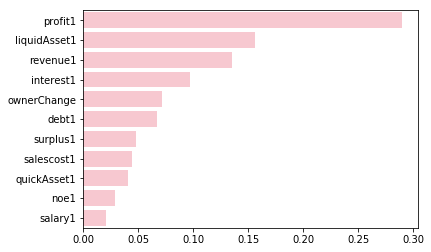

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
x, y = [list(x) for x in zip(*sorted(zip(rf.feature_importances_, col),reverse=True))]
fig, ax = plt.subplots()
sns.barplot(x, y, color='pink')

profit1 변수가 모델에서 큰 영향력을 발휘하고 있고 salary1, noe1, quickAsset1, salescost1 변수는 모델에서 영향력이 약하다.

# Chapter 3. 회귀모델
## 문제 1. Boston 데이터를 8:2로 train과 test set으로 나누세요. (p: 0.2)


In [27]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=1234)

## 문제 2.
expand.grid를 이용하여 다음과 같은 데이터 프레임을 만드세요. (데이터 프레임 명: RMSE_rf)

In [28]:
from itertools import product
mtry=[3,4,5]
ntree=[10,100,200]
x=list(product(mtry, ntree))
c={'mtry':[i[0] for i in x],'ntree':[i[1] for i in x], 'RMSE':'NA'}
RMSE_rf=pd.DataFrame(c)
RMSE_rf

,mtry,ntree,RMSE
0,3,10,NA
1,3,100,NA
2,3,200,NA
3,4,10,NA
4,4,100,NA
5,4,200,NA
6,5,10,NA
7,5,100,NA
8,5,200,NA


## 문제 3.
medv를 종속변수로 하는 랜덤포레스트에 대한 5-fold CV 그리드서치를 진행하여 RMSE_rf의 RMSE 변수에
해당 RMSE값을 넣으세요. (이중 for문을 이용하여 직접 코드를 짤 것)


In [29]:
from sklearn.ensemble import RandomForestRegressor
param = {'max_features':[3,4,5], 'n_estimators':[10,100,200]}
rf = RandomForestRegressor(random_state=1234)
rf.fit(X_train,y_train)
rf_grid = GridSearchCV(rf, param_grid=param, scoring='neg_mean_squared_error')
rf_grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=1234),
             param_grid={'max_features': [3, 4, 5],
                         'n_estimators': [10, 100, 200]},
             scoring='neg_mean_squared_error')

In [30]:
RMSE_rf['RMSE']=-rf_grid.cv_results_['mean_test_score']
RMSE_rf

,mtry,ntree,RMSE
0,3,10,16.499008
1,3,100,13.762698
2,3,200,13.665703
3,4,10,14.403357
4,4,100,12.918773
5,4,200,12.891598
6,5,10,14.425158
7,5,100,13.003433
8,5,200,13.090053


## 문제 4.
RMSE_rf에서 가장 낮은 RMSE값을 가진 행을 출력하세요

In [31]:
RMSE_rf[RMSE_rf['RMSE']==RMSE_rf['RMSE'].min()]

,mtry,ntree,RMSE
5,4,200,12.891598


## 문제 5. 
train set으로 그리드 서치로 나온 가장 좋은 조합의 파라미터의 랜덤포레스트를 학습시킨 후, test set의
RMSE를 구하세요

In [32]:
rf_grid.best_params_

{'max_features': 4, 'n_estimators': 200}

In [33]:
from sklearn import metrics
rf = RandomForestRegressor(n_estimators=200, max_features=4, random_state=1234)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
metrics.mean_squared_error(y_test, pred)

9.094981105392145